In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df = pd.read_csv('CarPriceprediction.csv')
df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
missing_values = df.isnull().sum()
data_types = df.dtypes
print("Missing values in each column:\n", missing_values)
print("\nData types of the columns:\n", data_types)


Missing values in each column:
 car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Data types of the columns:
 car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight         

**Handling Missing Values, Encoding**

In [6]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoder = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])
scaler = StandardScaler()
numerical_columns=df.select_dtypes(include=['int64','float64']).columns
df[numerical_columns]=scaler.fit_transform(df[numerical_columns])



In [7]:
df.head()

car_ID  symboling  CarName  fueltype  aspiration  doornumber  carbody  \
0 -1.723622   1.743470        2         1           0           1        0   
1 -1.706724   1.743470        3         1           0           1        0   
2 -1.689826   0.133509        1         1           0           1        2   
3 -1.672928   0.938490        4         1           0           0        3   
4 -1.656029   0.938490        5         1           0           0        3   

   drivewheel  enginelocation  wheelbase  ...  enginesize  fuelsystem  \
0           2               0  -1.690772  ...    0.074449           5   
1           2               0  -1.690772  ...    0.074449           5   
2           2               0  -0.708596  ...    0.604046           5   
3           1               0   0.173698  ...   -0.431076           5   
4           0               0   0.107110  ...    0.218885           5   

   boreratio    stroke  compressionratio  horsepower   peakrpm   citympg  \
0   0.519071 -1.839377         -0.288349    0.174483 -0.262960 -0.646553   
1   0.519071 -1.839377         -0.288349    0.174483 -0.262960 -0.646553   
2  -2.404880  0.685946         -0.288349    1.264536 -0.262960 -0.953012   
3  -0.517266  0.462183         -0.035973   -0.053668  0.787855 -0.186865   
4  -0.517266  0.462183         -0.540725    0.275883  0.787855 -1.106241   

   highwaympg     price  
0   -0.546059  0.027391  
1   -0.546059  0.404461  
2   -0.691627  0.404461  
3   -0.109354  0.084485  
4   -1.273900  0.523668  

[5 rows x 26 columns]

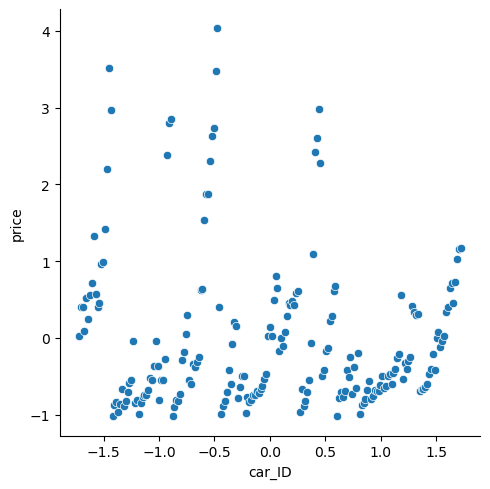

In [9]:
import seaborn as sns
sns.relplot(x='car_ID',y='price',data=df)

<Axes: xlabel='price'>

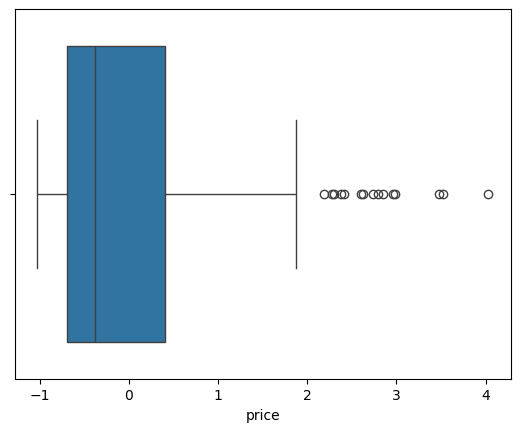

In [10]:
sns.boxplot(x='price',data=df)

<Axes: xlabel='price', ylabel='Count'>

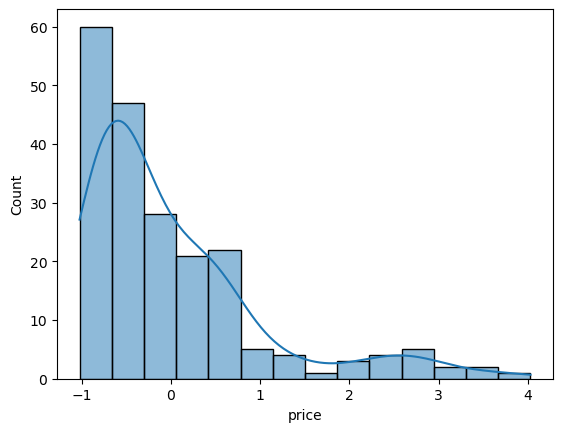

In [11]:
sns.histplot(x=df.price,kde=True)

**Feature Selection and Model Preparation**

In [13]:
from sklearn.model_selection import train_test_split
target_column = 'price'
X = df.drop(columns=[target_column])
y = df[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training features shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing features shape:", X_test.shape)
print("Testing labels shape:", y_test.shape)


Training features shape: (164, 25)
Training labels shape: (164,)
Testing features shape: (41, 25)
Testing labels shape: (41,)


<b>Linear Regression Model</b>

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.19376534149371166
R-squared: 0.8441158536668154


<b>Random Forest Model</b>

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R-squared: {r2_rf}")


Random Forest Mean Squared Error: 0.0551528138723683
Random Forest R-squared: 0.9556295814200283


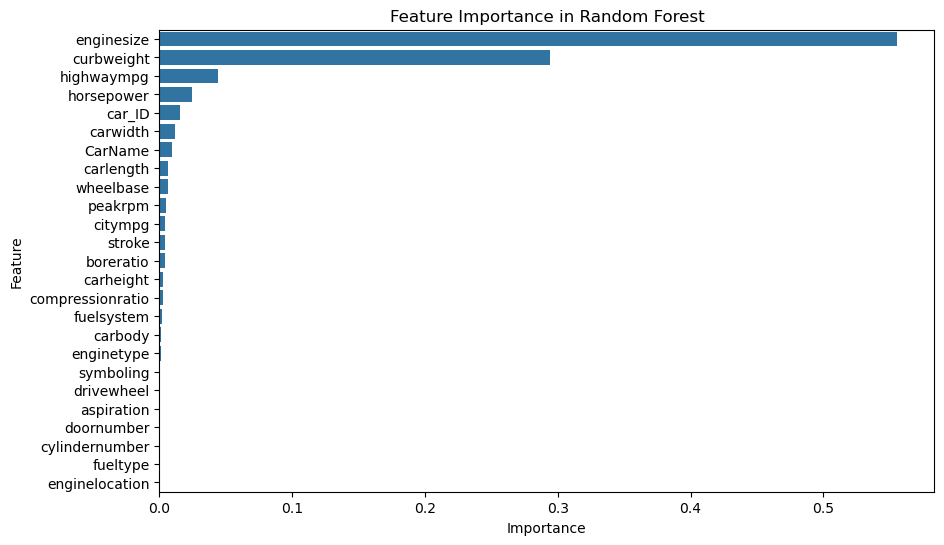

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance in Random Forest')
plt.show()


<b>Decision Tree Model</b>

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Decision Tree Mean Squared Error: {mse_dt}")
print(f"Decision Tree R-squared: {r2_dt}")


Decision Tree Mean Squared Error: 0.14730506359938372
Decision Tree R-squared: 0.8814931302330422


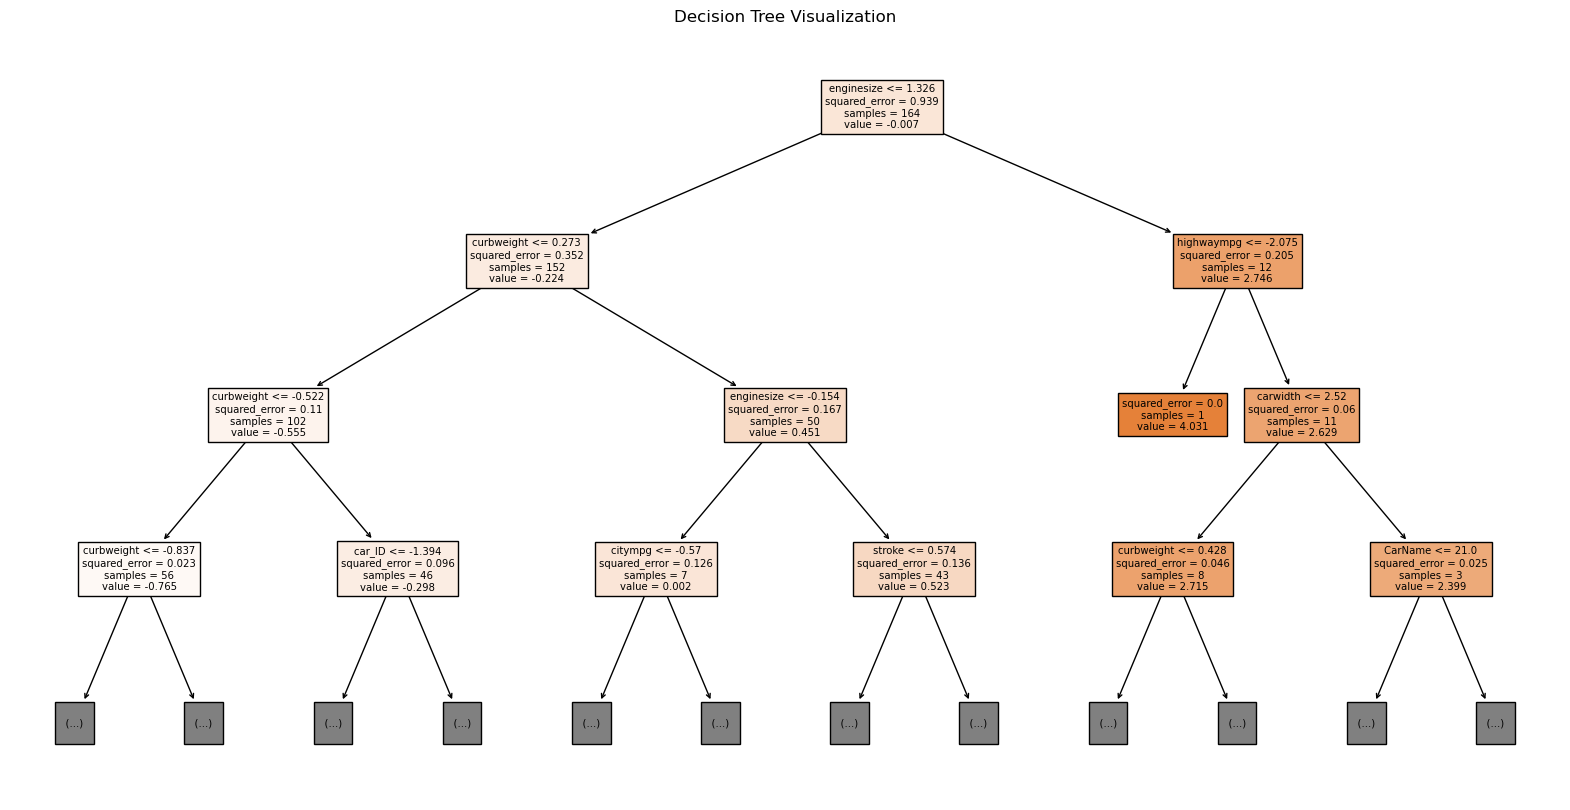

In [21]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
tree.plot_tree(dt_model, filled=True, feature_names=X.columns, max_depth=3)
plt.title("Decision Tree Visualization")
plt.show()


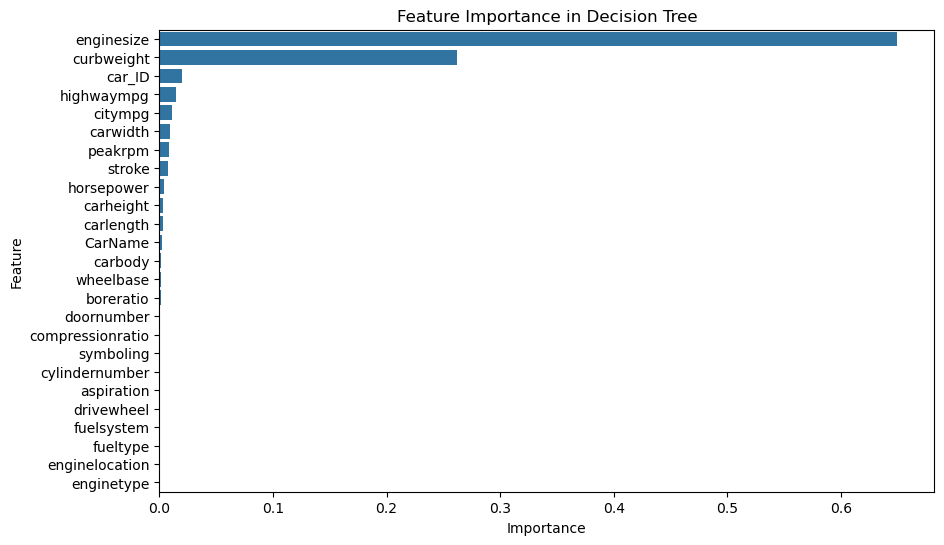

In [22]:
feature_importances_dt = dt_model.feature_importances_
feature_importance_df_dt = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_dt})
feature_importance_df_dt = feature_importance_df_dt.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_dt)
plt.title('Feature Importance in Decision Tree')
plt.show()


<b>SVM</b>

In [24]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
svm_model = SVR(kernel='rbf')  
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)
print(f"SVM Mean Squared Error: {mse_svm}")
print(f"SVM R-squared: {r2_svm}")


SVM Mean Squared Error: 0.7777883478899447
SVM R-squared: 0.37426955871436496


In [28]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.1, 0.2, 0.5, 1],
    'kernel': ['rbf', 'linear', 'poly']
}

# Initialize GridSearchCV with SVR and the parameter grid
grid_search_svm = GridSearchCV(SVR(), param_grid, cv=5, scoring='r2')

# Fit the grid search model
grid_search_svm.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters for SVM: ", grid_search_svm.best_params_)

# Train the best model and evaluate
best_svm_model = grid_search_svm.best_estimator_
y_pred_best_svm = best_svm_model.predict(X_test)

# Evaluate the tuned SVM model
mse_best_svm = mean_squared_error(y_test, y_pred_best_svm)
r2_best_svm = r2_score(y_test, y_pred_best_svm)

print(f"Tuned SVM Mean Squared Error: {mse_best_svm}")
print(f"Tuned SVM R-squared: {r2_best_svm}")


Best Parameters for SVM:  {'C': 1, 'epsilon': 0.2, 'kernel': 'linear'}
Tuned SVM Mean Squared Error: 0.19314696555715855
Tuned SVM R-squared: 0.8446133368815094


<b>KNN</b>

In [33]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
knn_model = KNeighborsRegressor(n_neighbors=5) 
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f"KNN Mean Squared Error: {mse_knn}")
print(f"KNN R-squared: {r2_knn}")


KNN Mean Squared Error: 0.25164270907254027
KNN R-squared: 0.7975535326269074


In [35]:
from sklearn.model_selection import GridSearchCV

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance']  # Weights can be 'uniform' or 'distance'
}

grid_search_knn = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv=5, scoring='r2')

grid_search_knn.fit(X_train, y_train)

print("Best Parameters for KNN: ", grid_search_knn.best_params_)

best_knn_model = grid_search_knn.best_estimator_
y_pred_best_knn = best_knn_model.predict(X_test)

mse_best_knn = mean_squared_error(y_test, y_pred_best_knn)
r2_best_knn = r2_score(y_test, y_pred_best_knn)

print(f"Tuned KNN Mean Squared Error: {mse_best_knn}")
print(f"Tuned KNN R-squared: {r2_best_knn}")


Best Parameters for KNN:  {'n_neighbors': 3, 'weights': 'distance'}
Tuned KNN Mean Squared Error: 0.15125760186847373
Tuned KNN R-squared: 0.8783133146417883


In [37]:

print(f"Linear Regression Mean Squared Error: {mse}")
print(f"Linear Regression R-squared: {r2}")

print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R-squared: {r2_rf}")

print(f"Decision Tree Mean Squared Error: {mse_dt}")
print(f"Decision Tree R-squared: {r2_dt}")

print(f"SVM Mean Squared Error: {mse_svm}")
print(f"SVM R-squared: {r2_svm}")

print(f"KNN Mean Squared Error: {mse_knn}")
print(f"KNN R-squared: {r2_knn}")


Linear Regression Mean Squared Error: 0.19376534149371166
Linear Regression R-squared: 0.8441158536668154
Random Forest Mean Squared Error: 0.0551528138723683
Random Forest R-squared: 0.9556295814200283
Decision Tree Mean Squared Error: 0.14730506359938372
Decision Tree R-squared: 0.8814931302330422
SVM Mean Squared Error: 0.7777883478899447
SVM R-squared: 0.37426955871436496
KNN Mean Squared Error: 0.25164270907254027
KNN R-squared: 0.7975535326269074


In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# After fitting the model
y_pred = best_svm_model.predict(X_test)

# Collect evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 0.19314696555715855
Mean Absolute Error (MAE): 0.27080005057465856
R-squared (R²): 0.8446133368815094


In [41]:
results = {
    "Model": ["Linear Regression", "Random Forest", "Decision Tree", "SVM", "KNN"],
    "MSE": [mse, mse_rf, mse_dt, mse_svm, mse_knn],  
    "R-squared": [r2, r2_rf, r2_dt, r2_svm, r2_knn]  
}

import pandas as pd


results_df = pd.DataFrame(results)


best_mse_model = results_df.sort_values(by="MSE").iloc[0]


best_r2_model = results_df.sort_values(by="R-squared", ascending=False).iloc[0]
results_df, best_mse_model, best_r2_model


(               Model       MSE  R-squared
 0  Linear Regression  0.193147   0.844613
 1      Random Forest  0.055153   0.955630
 2      Decision Tree  0.147305   0.881493
 3                SVM  0.777788   0.374270
 4                KNN  0.251643   0.797554,
 Model        Random Forest
 MSE               0.055153
 R-squared          0.95563
 Name: 1, dtype: object,
 Model        Random Forest
 MSE               0.055153
 R-squared          0.95563
 Name: 1, dtype: object)

In [52]:
import pickle
with open('CarPricePrediction.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

In [54]:
with open('CarPricePrediction.pkl', 'rb') as file:
    loaded_model = pickle.load(file)